# 手書き文字の分類

MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成されます。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

In [2]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=FalseでDataFrame型ではなくndarray型で読み込む

sklearn.datasetsを通じでMNISTをndarray型でデータが読み込まれます。
- ```data```キーは、インスタンスごと１行、特徴量ごとに1列という形の配列を格納する
- ```label``` キーは、ラベルの配列を格納する

In [3]:
print(minist.data.shape) # (70000, 784) 70000枚の画像データ、1枚あたり28×28=784の画素データ
print(minist.target.shape) # (70000,) 70000枚の画像データに対応するラベルデータ

(70000, 784)
(70000,)


つまり、70000個の画像データがあり、個々の画像には784個の特徴量があります。

各画像が$28 \times 28$ピクセルで、 個々の特徴量は$0$(白)から255(黒)までの値でピクセルの明度を表しています。

以下は、$0$番目のインスタンスの特徴量ベクトルを取り出して、$28 \times 28$配列の形に変換し、可視化すると、$5$のように見える数字が確認できます。

対応する$0$番目のラベルデータを確認すると、ラベルは$5$であることがわかりました。

In [7]:
minist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

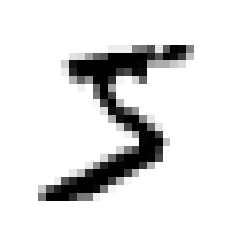

In [5]:
import matplotlib.pyplot as plt

some_digit = minist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [4]:
# 対応するラベルデータ
minist.target[0] # 5

'5'

MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
# 画像データとラベルを取得します。
X = minist.data
y = minist.target

# データを訓練データとテストデータに分割します。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest を使用してモデルを構築します。
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# テストデータを使用してモデルを評価します。
y_pred = clf.predict(X_test)

# 評価結果を表示します。
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9680714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.97      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [6]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9764285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



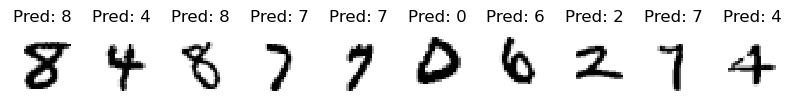

In [9]:
# 画像と予測ラベルを表示
fig, axes = plt.subplots(1, 10, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}')

plt.show()

## Other Computer Vision (CV) Task

![](https://lh4.googleusercontent.com/dKojvoGlE4KB2F9QSeCx4KKbMcGYJ2ZVfdbYFc2ogduJua7Ft752pGx6pue81Ry2avjWWA7-aPd9d7nZ53JiKqzvWe-Sm-TNyuDZQZw0OIgCbux7eN8gtVsXy6N-d_AvTzLL4PP1N_ExtpC5OA)

![](https://asite.aim.edu/wp-content/uploads/2021/10/9.-WearMaskNet-Real-Time-Face-Mask-Detection.png)